This script converts lists of polygon vertices from an excel file into segmentation masks
The vertices were obtained using http://www.robots.ox.ac.uk/~vgg/software/via/via_demo.html

In [1]:
import numpy as np
import os
import pandas as pd
import ast
import matplotlib.path as mplPath
import matplotlib.pyplot as plt
import matplotlib.image 
import cv2

In [145]:
path = r'C:\Users\hanson\Documents\thesis\TCB\excel_vertices\1mg1mL'
os.chdir(path)
os.listdir(path)

['00013_annot0.xlsx',
 '00015_annot1.xlsx',
 '00078_annot2.xlsx',
 '00081_annot3.xlsx',
 '00083_annot4.xlsx',
 '00084_annot5.xlsx',
 '00087_annot6.xlsx',
 '00090_annot7.xlsx']

In [146]:
# Have to format excel file as per the test file here
# Reading lists of vertices into target lists
df = pd.read_excel('00090_annot7.xlsx')
init = {}
for num,x,y in zip(range(len(df['x'])),df['x'].tolist(),df['y'].tolist()):
    init[num] = np.array([(x,y) for x,y in zip(ast.literal_eval(x),ast.literal_eval(y))])

In [147]:
# Creating initial dictionary of labels
polygons = {label+'{}'.format(n):polygon for n,label,polygon in zip(range(len(df['class'].tolist())),
                                                                    df['class'].tolist(),init.values())}


In [148]:
# Point in polygon testing:
# https://stackoverflow.com/questions/16625507/python-checking-if-point-is-inside-a-polygon
# N,M are img dims
N,M = 514,514
p = [(x,y) for x in range(N) for y in range(M)]
labels = {}
for polygon in polygons.items():
    path = mplPath.Path(polygon[1])
    pointinpolygon = [path.contains_point(pixel) for pixel in p]
    labels[polygon[0]] = pointinpolygon

In [149]:
final_masks = {}
for label in labels.items():
    x = [i for i in range(len(label[1])) if label[1][i]==True]
    final_masks[label[0]] = [p[j] for j in x]

In [150]:
# User has to define classes here
O1,O2,O3,O4,O5,O6 = [],[],[],[],[],[]
for keys, vals in final_masks.items():
    if 'O1' in keys:
        O1.append(vals)
    if 'O2' in keys:
        O2.append(vals)
    if 'O3' in keys:
        O3.append(vals)
    if 'O4' in keys:
        O4.append(vals)
    if 'O5' in keys:
        O5.append(vals)
    if 'O6' in keys:
        O6.append(vals)
class_list = [O1,O2,O3,O4,O5,O6]

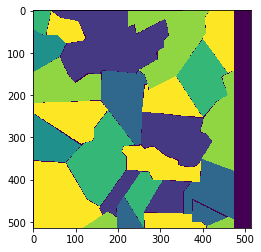

In [151]:
# Create image of masks
# N,M are img dims
no_classes = len(class_list)
img = np.zeros((N,M))
masks = np.arange(1,no_classes+1)
for n,classes in zip(range(len(class_list)),class_list):
    for sublist in classes:
        for coord in sublist:
            img[coord] = masks[n]
fig,ax = plt.subplots()
ax.imshow(img)

In [152]:
np.unique(img)

array([0., 1., 2., 3., 4., 5., 6.])

In [153]:
# Notice that there are numerous unlabeled pixels b/c handlabeling failed to get to them:
len(list(zip(*np.where(img==0))))

26362

In [154]:
# Replacing zeros with neighboring values
# Bit of brute force method: c.f. s list
# However seemingly works for all pixels
N,M
s = [(x,y) for x in range(-5,15,5) for y in range(-5,15,5)]
for tup in zip(*np.where(img==0)):
    list_1 = [(tup[0]+i,tup[1]+j) for (i,j) in s]
    for elem in list_1:
        if elem[0] < N and elem[1] < M:
            if img[elem]!=0:
                img[tup]=img[elem]
                #print here to see progress
            else:
                pass
        else:
            pass

0


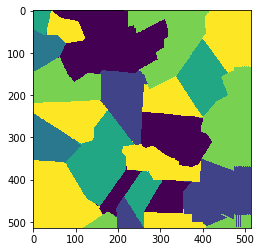

In [155]:
print(len(list(zip(*np.where(img==0)))))
plt.imshow(img)

In [156]:
os.chdir(r'C:\Users\hanson\Documents\thesis\TCB\annots\1mg1mL')
cv2.imwrite('annot7.png',img)

True

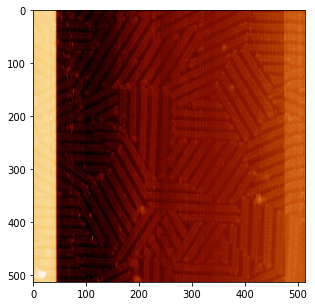

In [157]:
# For each train annot image, save the transposed train image as train image
os.chdir(r'C:\Users\hanson\Documents\thesis\TCB\imgdata\1mg1mL')
im = plt.imread('00090.jpg')
im = np.transpose(im,axes=[1,0,2])
os.chdir(r'C:\Users\hanson\Documents\thesis\TCB\train\1mg1mL')
cv2.imwrite('train7.jpg',im)
fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(im)